In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [31]:
def process_sp_data(data_name,short_name):
    df = pd.read_excel(f'../data/{data_name}.xlsx',skiprows=6)
    df = df.iloc[:-4]
    df.columns = ['date',f'{short_name}']
    df = df.set_index('date')
    df.tail()
    return df

In [58]:
sp_1_3 = process_sp_data('S&P U.S. Treasury Bond 1-3 Year Index','sp 1-3')
sp_3_5 = process_sp_data('S&P U.S. Treasury Bond 3-5 Year Index','sp 3-5')
sp_7_10 = process_sp_data('S&P U.S. Treasury Bond 7-10 Year Index','sp 7-10')

In [77]:
def process_ishares_data(data_name, short_name):
    df = pd.read_csv(f'../data/{data_name}.csv')
    df = df[['Date','Adj Close']]
    df.columns = ['date',f'{short_name}']
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index)
    return df

In [79]:
iShares_0_1 = process_ishares_data('iShares 0-1 Year Treasury ETF','iShares 0-1')
iShares_1_3 = process_ishares_data('iShares 1-3 Year Treasury ETF CSBGU3SW','iShares 1-3')
iShares_7_10 = process_ishares_data('iShares 7-10 Year Treasury ETF IEF','iShares 7-10')
iShares_10_20 = process_ishares_data('iShares 10-20 Year Treasury ETF TLH','iShares 10-20')
iShares_20 = process_ishares_data('iShares 20+ Year Treasury ETF TLT','iShares 20+')

In [82]:
iShares_20

,iShares 20+
date,
2019-02-25,108.403175
2019-02-26,108.939774
2019-02-27,107.705566
2019-02-28,107.338882
2019-03-01,106.346779
...,...
2024-02-16,92.760002
2024-02-20,92.839996
2024-02-21,92.180000


In [83]:
df_ls = [sp_1_3,sp_3_5,sp_7_10,iShares_0_1,iShares_1_3, iShares_7_10, iShares_10_20, iShares_20 ]

In [84]:
def combine_dfs(df_ls):
    df = pd.DataFrame(index=df_ls[0].index)
    for i in df_ls:
        df[i.columns[0]] = i
    return df

In [114]:
combined_df = combine_dfs(df_ls)
combined_df_short = combined_df[combined_df.index > '2021-12-31']
combined_df_short = combined_df_short[combined_df_short.index < '2023-03-31']
# could also do .last()
combined_df_q = combined_df_short.resample('Q').first()
combined_df_q

,sp 1-3,sp 3-5,sp 7-10,iShares 0-1,iShares 1-3,iShares 7-10,iShares 10-20,iShares 20+
date,,,,,,,,
2022-03-31,340.20,340.20,680.30,102.099998,113.699997,108.327118,136.194000,135.810303
2022-06-30,331.21,331.21,638.81,101.980003,110.839996,101.708519,126.305954,125.121727
2022-09-30,331.17,331.17,620.23,101.980003,110.660004,98.849396,114.192223,110.068626
2022-12-31,325.82,325.82,586.51,102.279999,108.730003,93.326981,104.728577,99.298790
2023-03-31,327.74,327.74,587.90,103.129997,109.540001,93.499557,105.387222,97.738518


In [117]:
combined_df.to_excel('../data/combined_index_df.xlsx')

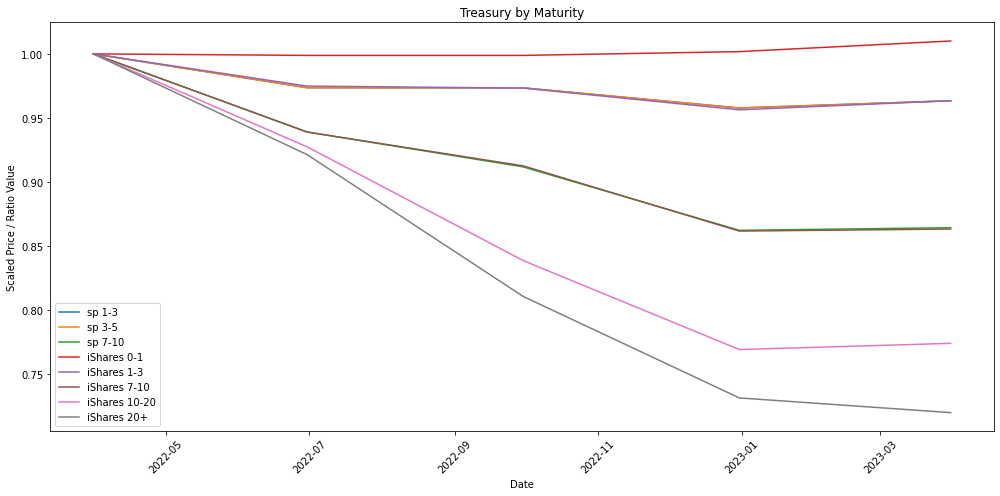

In [115]:
scaler = 1/combined_df_q.iloc[0]
scaled_df = combined_df_q * scaler

plt.figure(figsize=(14, 7))
for col in scaled_df:
    plt.plot(scaled_df.index,scaled_df[col],label=col)
    
plt.title('Treasury by Maturity')
plt.xlabel('Date')
plt.ylabel('Scaled Price / Ratio Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()